In [1]:
%load_ext autoreload
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
STAT_PATH = os.path.join(BASE_PATH, "stats")

In [3]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [4]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame, FrameScores, Stats

In [5]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

In [25]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist_ios")

metrics_handler = ExperimentSuitMetrics(base_experiment_path)
data = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout_std_mean", dtype=dtypes)

scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mc_25 = ExperimentFrame(data, scores=scores)
df_mc_25 = mc_25.get_frame()
df_mc_25.insert(0, "num_samples", 25)

In [24]:
base_experiment_path = os.path.join(METRICS_PATH, "mc_std_50")

metrics_handler = ExperimentSuitMetrics(base_experiment_path)
data = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout_std_mean", dtype=dtypes)

scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mc_50 = ExperimentFrame(data, scores=scores)
df_mc_50 = mc_50.get_frame()
df_mc_50.insert(0, "num_samples", 50)

[Text(0.5, 0, 'Labeled pool size'), Text(0, 0.5, 'Test Accuracy')]

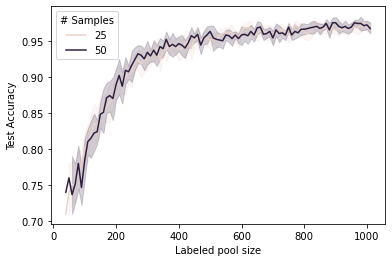

In [30]:
df_merged = pd.concat([df_mc_25, df_mc_50])
selector = df_merged["eval_sparse_categorical_accuracy"] > .7
fig = sns.lineplot(data=df_merged[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="num_samples")
fig.legend(title="# Samples")
fig.set(xlabel="Labeled pool size", ylabel="Test Accuracy")